In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import requests
import os

In [2]:
DATA_PATH = 'data/'

# Facilities
https://www.nyc.gov/site/planning/data-maps/open-data/dwn-selfac.page <br>
Columns descriptions: https://s-media.nyc.gov/agencies/dcp/assets/files/pdf/data-tools/bytes/facilities_readme.pdf

In [3]:
facilities_df = gpd.read_file(DATA_PATH + 'Facilities Database - Shapefile.zip')
facilities_df.head()

,address,addressnum,bbl,bin,boro,borocode,capacity,captype,cd,city,...,overlevel,policeprct,schooldist,servarea,streetname,uid,xcoord,ycoord,zipcode,geometry
0,1700 SEWARD AVENUE,1700,2.035510e+09,2092649.0,BRONX,2.0,0.0,None,209.0,BRONX,...,City,43.0,08,Local,SEWARD AVENUE,000e429e30120017c73af5e842d6cefb,1.020918e+06,237367.257397,10473,POINT (-73.86752 40.81811)
1,801 BARTHOLDI STREET,801,2.046330e+09,2057044.0,BRONX,2.0,0.0,None,212.0,BRONX,...,City,47.0,11,Local,BARTHOLDI STREET,000f976f2d69b025dda2093070ef0b59,1.022291e+06,257805.905100,10467,POINT (-73.86245 40.87420)
2,None,None,1.008620e+09,1017016.0,MANHATTAN,1.0,0.0,None,105.0,NEW YORK,...,State,14.0,02,Local,None,001129c4253330bb6ac71968f8d7f3e2,9.888800e+05,211236.809176,10016,POINT (-73.98329 40.74646)
3,1930 RANDALL AVENUE,1930,2.035280e+09,2090508.0,BRONX,2.0,0.0,None,209.0,BRONX,...,City,43.0,08,Local,RANDALL AVENUE,0017a60d2456ff9f3d9f48b11aaf8001,1.023933e+06,237088.716931,10473,POINT (-73.85663 40.81733)
4,22201 98 AVENUE,22201,4.108080e+09,4430408.0,QUEENS,4.0,0.0,None,413.0,QUEENS VILLAGE,...,State,105.0,29,Regional,98 AVENUE,00193957d1a78172a7e1726a807e90e6,1.059039e+06,200706.299293,11429,POINT (-73.73021 40.71724)


In [4]:
facilities_df['factype'].unique()

array(['NYCHA COMMUNITY CENTER - CHILD CARE - UPK 2015',
       'ELEMENTARY SCHOOL - NON-PUBLIC', 'STATE HISTORIC PLACE',
       'SUMMER ONLY FEEDING SITE', 'BUS STATION',
       'REGISTERED ESL SCHOOLS', 'TRIANGLE/PLAZA', 'THEATER',
       'ELEMENTARY SCHOOL - PUBLIC', 'DANCE', 'COMMERCIAL GARAGE',
       'DSNY GARAGE', 'COMMERCIAL GARAGE AND PARKING LOT', 'TEXTILES',
       'ELECTRONICS', 'COMPOST', 'MUSEUM', 'CUSTODIAL', 'FEEDING SITE',
       'OUTDOOR PARKING - EMPLOYEES', 'NURSING HOME', 'NEW MEDIA',
       'WASTEWATER PUMPING STATION', 'TOW TRUCK COMPANY', 'LITERATURE',
       'PUBLIC LIBRARY', 'PLAYGROUND', 'REGISTERED BUSINESS SCHOOLS',
       'LICENSED PRIVATE SCHOOLS', 'GARDEN', 'HOSPITAL EXTENSION CLINIC',
       'TRANSFER STATION', 'FIELD OFFICE-PUBLIC', 'VDF',
       'SCRAP METAL PROCESSING',
       'JUNIOR HIGH-INTERMEDIATE-MIDDLE SCHOOL - PUBLIC', 'VISUAL ARTS',
       'INDOOR STORAGE - EQUIPMENT', 'MUSIC', 'K-8 SCHOOL - PUBLIC',
       'FILM/VIDEO/AUDIO', 'MOBILE HOSPIT

In [5]:
facilities_df['facdomain'].unique()

array(['EDUCATION, CHILD WELFARE, AND YOUTH',
       'PARKS, GARDENS, AND HISTORICAL SITES',
       'CORE INFRASTRUCTURE AND TRANSPORTATION',
       'LIBRARIES AND CULTURAL PROGRAMS', 'ADMINISTRATION OF GOVERNMENT',
       'HEALTH AND HUMAN SERVICES',
       'PUBLIC SAFETY, EMERGENCY SERVICES, AND ADMINISTRATION OF JUSTICE'],
      dtype=object)

In [6]:
facilities_df['facgroup'].unique()

array(['DAY CARE AND PRE-KINDERGARTEN', 'SCHOOLS (K-12)',
       'HISTORICAL SITES', 'CHILD SERVICES AND WELFARE', 'TRANSPORTATION',
       'VOCATIONAL AND PROPRIETARY SCHOOLS', 'PARKS AND PLAZAS',
       'CULTURAL INSTITUTIONS', 'SOLID WASTE',
       'CITY AGENCY PARKING, MAINTENANCE, AND STORAGE', 'HEALTH CARE',
       'WATER AND WASTEWATER', 'LIBRARIES',
       'OFFICES, TRAINING, AND TESTING', 'PUBLIC SAFETY',
       'JUSTICE AND CORRECTIONS', 'HUMAN SERVICES', 'HIGHER EDUCATION',
       'ADULT SERVICES', 'EMERGENCY SERVICES',
       'MATERIAL SUPPLIES AND MARKETS', 'OTHER PROPERTY',
       'YOUTH SERVICES', 'CAMPS', 'TELECOMMUNICATIONS'], dtype=object)

In [8]:
facilities_df.crs, print(f"Shape: {facilities_df.shape}")

Shape: (34171, 38)


(<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
 Name: WGS84(DD)
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (degree)
 - lat[north]: Latitude (degree)
 Area of Use:
 - undefined
 Datum: WGS84
 - Ellipsoid: WGS84
 - Prime Meridian: Greenwich,
 None)

Text(0.5, 1.0, 'Mapa obiektów')

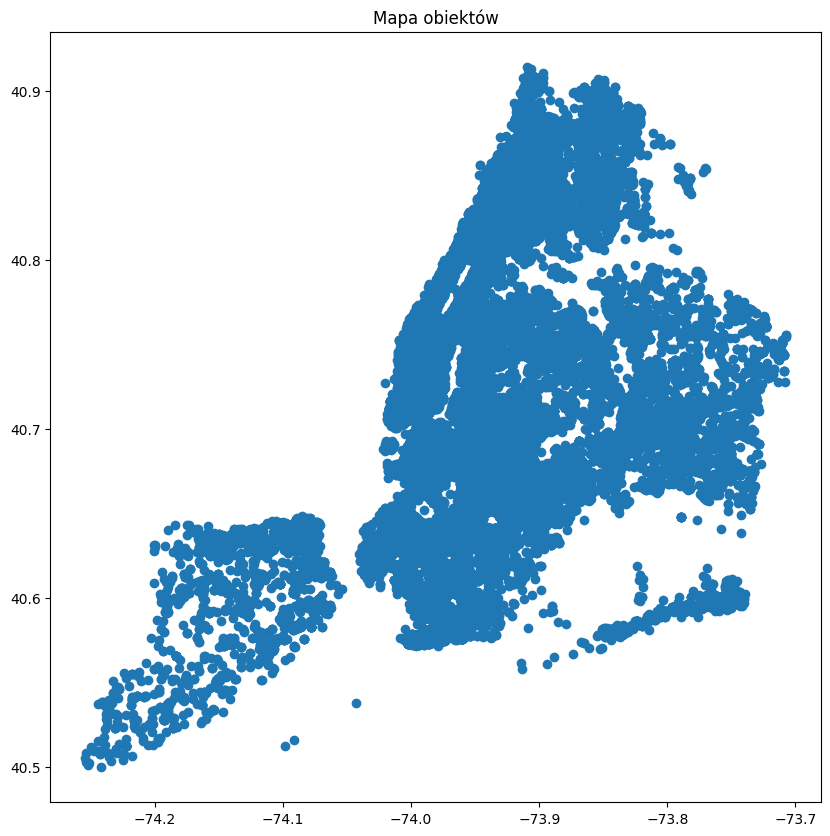

In [9]:
facilities_df.plot(figsize=(10,10))
plt.title("Mapa obiektów")

# Digital City Map
https://data.cityofnewyork.us/City-Government/Digital-City-Map-Shapefile/m2vu-mgzw <br>
https://www.nyc.gov/site/planning/data-maps/open-data/dwn-digital-city-map.page <br>
https://s-media.nyc.gov/agencies/dcp/assets/files/pdf/data-tools/bytes/dcm.pdf

In [10]:
city_map_df = gpd.read_file(DATA_PATH+'Digital City Map   Shapefile.zip')

Shape: (5363, 22)


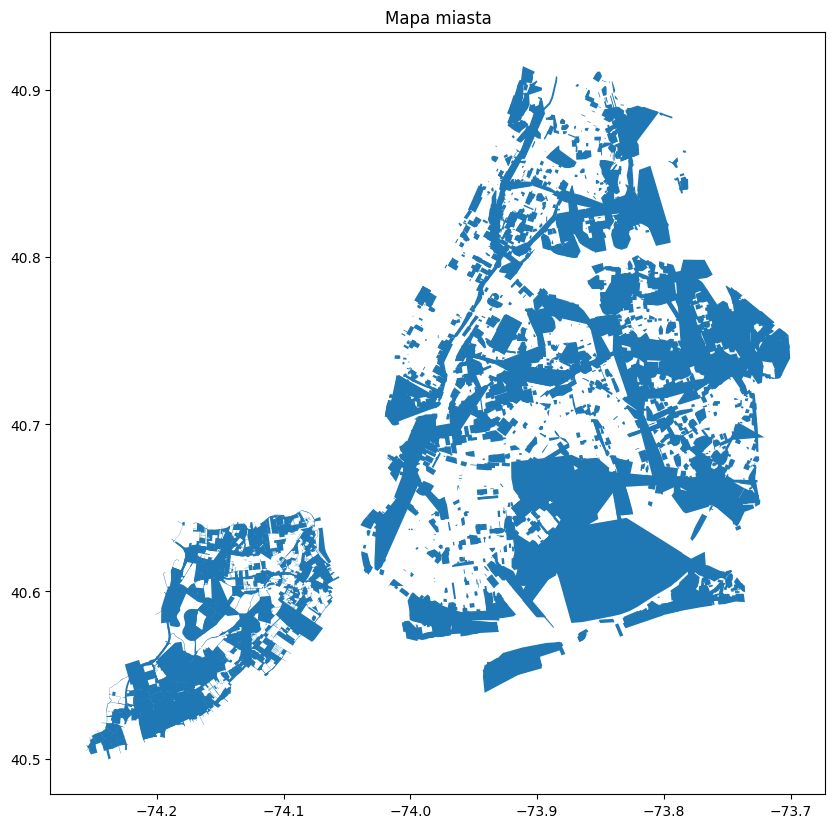

In [11]:
city_map_df.plot(figsize=(10,10))
plt.title("Mapa miasta")
print(f"Shape: {city_map_df.shape}")

# Rest, for example subway stations

Shape: (491, 15)


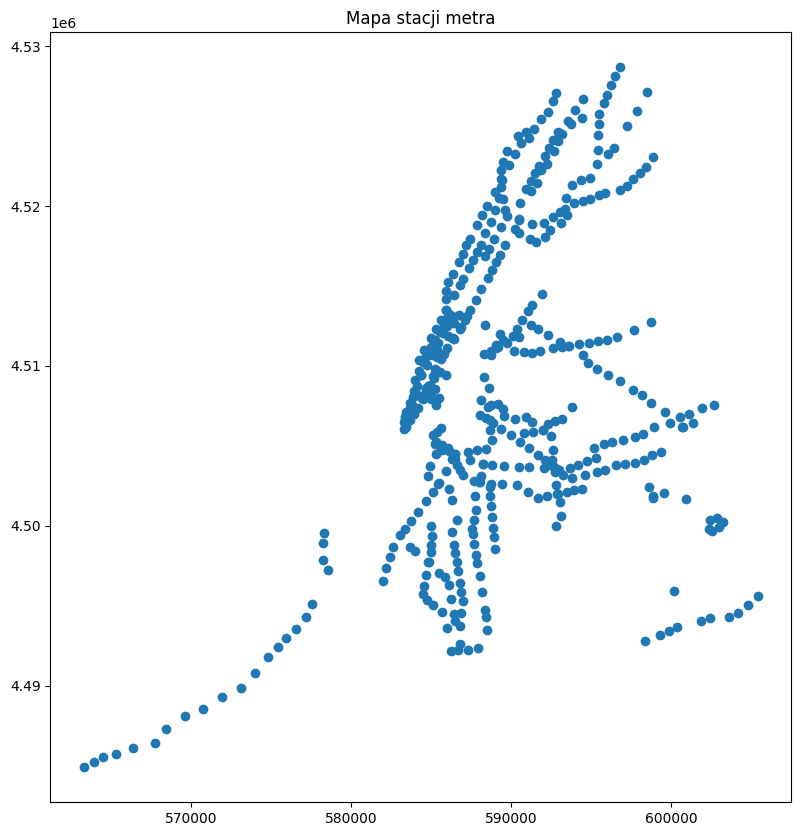

In [17]:
city_map_subway_df = gpd.read_file(DATA_PATH+'ny_data/subway_stations')
city_map_subway_df.plot(figsize=(10,10))
plt.title("Mapa stacji metra")
print(f"Shape: {city_map_subway_df.shape}")

In [16]:
city_map_subway_df.head()

,OBJECTID,ID,NAME,ALT_NAME,CROSS_ST,LONG_NAME,LABEL,BOROUGH,NGHBHD,ROUTES,TRANSFERS,COLOR,EXPRESS,CLOSED,geometry
0,1.0,376.0,Cortlandt St,None,Church St,"Cortlandt St (R,W) Manhattan","Cortlandt St (R,W)",Manhattan,None,"R,W","R,W",YELLOW,None,None,POINT (583521.854 4507077.863)
1,2.0,2.0,Rector St,None,None,Rector St (1) Manhattan,Rector St (1),Manhattan,None,1,1,RED,None,None,POINT (583324.487 4506805.373)
2,3.0,1.0,South Ferry,None,None,South Ferry (1) Manhattan,South Ferry (1),Manhattan,None,1,1,RED,None,None,POINT (583304.182 4506069.654)
3,4.0,125.0,138th St,Grand Concourse,Grand Concourse,"138th St / Grand Concourse (4,5) Bronx","138th St / Grand Concourse (4,5)",Bronx,None,"4,5","4,5",GREEN,None,None,POINT (590250.106 4518558.020)
4,5.0,126.0,149th St,Grand Concourse,Grand Concourse,149th St / Grand Concourse (4) Bronx,149th St / Grand Concourse (4),Bronx,None,4,"2,4,5",GREEN,express,None,POINT (590454.740 4519145.720)


# NYPD Complaint Data Current (Year To Date)
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243 <br>

In [18]:
nyc_comp_df = gpd.read_file(DATA_PATH+'NYPD Complaint Data Current (Year To Date).zip')

In [19]:
nyc_comp_df

,cmplnt_num,addr_pct_c,boro_nm,date_cmpln,time_cmpln,cmplnt_fr_,date_cmp_2,time_cmp_2,cmplnt_to_,crm_atpt_c,...,vic_sex,x_coord_cd,y_coord_cd,latitude,longitude,lat_lon_ad,lat_lon_ci,lat_lon_st,lat_lon_zi,geometry
0,270652286,43.0,BRONX,2023-07-01,00:00:00.000,05:00:00,None,None,(null),COMPLETED,...,F,1020219.0,239110.0,40.822912,-73.870041,None,None,None,None,POINT (-73.87004 40.82291)
1,269679657H1,NaN,MANHATTAN,2023-06-09,00:00:00.000,08:13:00,None,None,(null),COMPLETED,...,M,NaN,NaN,NaN,NaN,None,None,None,None,None
2,270825324,122.0,STATEN ISLAND,2023-07-02,00:00:00.000,19:30:00,2023-07-02,00:00:00.000,20:00:00,COMPLETED,...,F,946681.0,142778.0,40.558491,-74.135201,None,None,None,None,POINT (-74.13520 40.55849)
3,274700214,1.0,MANHATTAN,2023-09-19,00:00:00.000,18:05:00,2023-09-19,00:00:00.000,20:15:00,COMPLETED,...,M,980863.0,198480.0,40.711458,-74.012216,None,None,None,None,POINT (-74.01222 40.71146)
4,272352661,123.0,STATEN ISLAND,2023-08-03,00:00:00.000,17:20:00,2023-08-03,00:00:00.000,17:35:00,COMPLETED,...,F,926582.0,136703.0,40.541709,-74.207482,None,None,None,None,POINT (-74.20748 40.54171)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415305,267120705,103.0,QUEENS,2023-04-23,00:00:00.000,03:55:00,2023-04-23,00:00:00.000,04:03:00,COMPLETED,...,M,1044256.0,197271.0,40.707937,-73.783565,None,None,None,None,POINT (-73.78356 40.70794)
415306,264248232,105.0,QUEENS,2023-02-19,00:00:00.000,09:00:00,2023-02-26,00:00:00.000,08:00:00,COMPLETED,...,F,1062455.0,212970.0,40.750884,-73.717741,None,None,None,None,POINT (-73.71774 40.75088)
415307,267026380,105.0,QUEENS,2023-04-21,00:00:00.000,01:50:00,2023-04-21,00:00:00.000,01:53:00,COMPLETED,...,M,1060576.0,203292.0,40.724337,-73.724633,None,None,None,None,POINT (-73.72463 40.72434)
415308,269438940,107.0,QUEENS,2023-06-06,00:00:00.000,09:25:00,2023-06-06,00:00:00.000,09:27:00,COMPLETED,...,F,1048247.0,200458.0,40.716656,-73.769140,None,None,None,None,POINT (-73.76914 40.71666)


In [20]:
nyc_comp_df[(nyc_comp_df['latitude'] == 0) | (nyc_comp_df['longitude'] == 0)]

,cmplnt_num,addr_pct_c,boro_nm,date_cmpln,time_cmpln,cmplnt_fr_,date_cmp_2,time_cmp_2,cmplnt_to_,crm_atpt_c,...,vic_sex,x_coord_cd,y_coord_cd,latitude,longitude,lat_lon_ad,lat_lon_ci,lat_lon_st,lat_lon_zi,geometry
346097,265828516,1.0,MANHATTAN,2023-03-29,00:00:00.000,01:55:00,2023-03-29,00:00:00.000,02:21:00,COMPLETED,...,E,0.0,0.0,0.0,0.0,None,None,None,None,POINT (0.00000 0.00000)


In [21]:
nyc_comp_df.replace(0, pd.NA, inplace=True)
nyc_comp_df_cleaned = nyc_comp_df.dropna(subset=['longitude', 'latitude'])
nyc_comp_df_cleaned[(nyc_comp_df_cleaned['latitude'] == 0) | (nyc_comp_df_cleaned['longitude'] == 0)]

,cmplnt_num,addr_pct_c,boro_nm,date_cmpln,time_cmpln,cmplnt_fr_,date_cmp_2,time_cmp_2,cmplnt_to_,crm_atpt_c,...,vic_sex,x_coord_cd,y_coord_cd,latitude,longitude,lat_lon_ad,lat_lon_ci,lat_lon_st,lat_lon_zi,geometry


Text(0.5, 1.0, 'Mapa przestępstw')

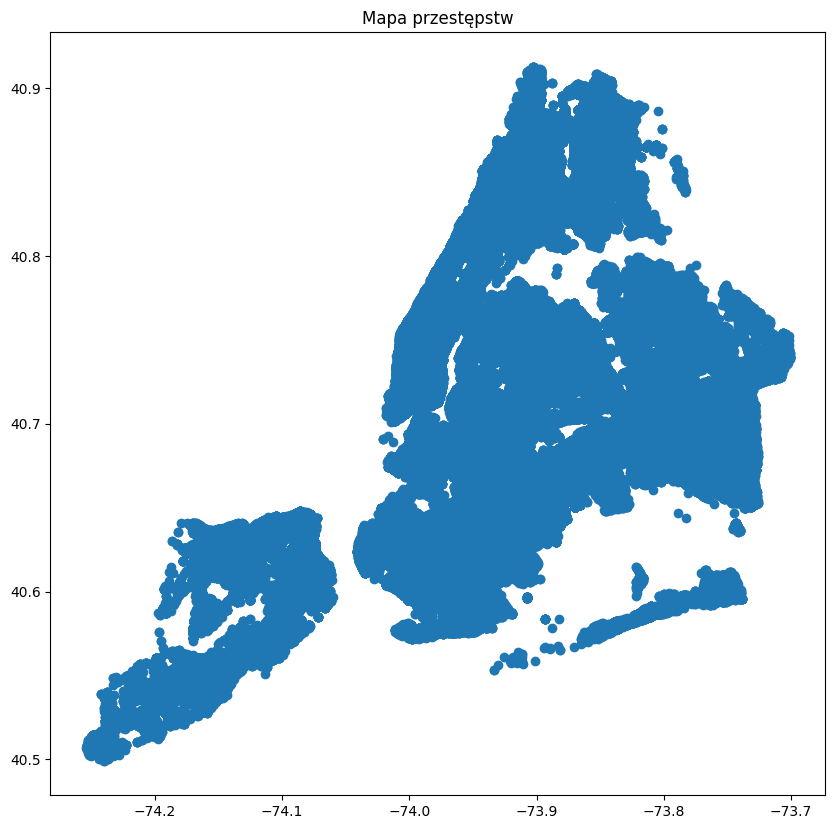

In [22]:
nyc_comp_df_cleaned.plot(figsize=(10,10))
plt.title("Mapa przestępstw")